**CUSTOMER LIFETIME VALUE PREDICTION**

**Customer Lifetime Value (CLTV)** represents the total amount of money a customer is expected to spend in a business during his/her lifetime. This is an important metric to monitor because it helps to make decisions about how much money to invest in acquiring new customers and retaining existing ones.

**Aim -**
Predict the lifetime value of customers for a business based on their historical
interaction
 value.

**Importing Files**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [2]:
data = pd.read_excel('online_retail_dataset.xlsx', sheet_name='Online Retail')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.shape

(541909, 8)

**Exploratory data analysis (EDA)**

Let us have a look at the data and decide whether we need any data cleaning and data transformation for further analysis

*Null Values*

In [6]:
print('No. of missing values in the datasets:', data.isnull().sum().sum())
print('Percentage of missing values in the dataset:', data.isnull().sum().sum()*100/(data.shape[0]*data.shape[1]))

No. of missing values in the datasets: 136534
Percentage of missing values in the dataset: 3.149375633178264


In [7]:
print("Number of missing values in 'Description' column:", data['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", data['Description'].isnull().sum()*100/data.shape[0])

Number of missing values in 'Description' column: 1454
Percentage of missing values in 'Description' column: 0.2683107311375157


In [8]:
print("Number of missing values in 'Customer ID' column:", data['CustomerID'].isnull().sum())
print("Percentage of missing values in 'Customer ID' column:", data['CustomerID'].isnull().sum()*100/data.shape[0])

Number of missing values in 'Customer ID' column: 135080
Percentage of missing values in 'Customer ID' column: 24.926694334288598


Duplicates

In [9]:
data.duplicated().sum().sum()

5268

In [10]:
duplicate_value = data[data.duplicated()]

In [11]:
duplicate_value[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


Number of unique customers

In [12]:
# uniques
data["CustomerID"].nunique()

4372

Number of purchases

In [13]:
data['InvoiceNo'].nunique()

25900

Period of Time

In [14]:
min_max = (data['InvoiceDate'].min(), 
           data['InvoiceDate'].max())
print(min_max)

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))


*Country*

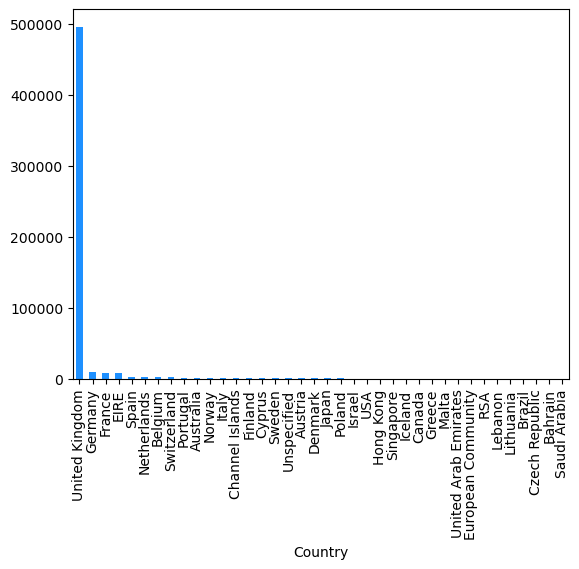

In [15]:
data['Country'].value_counts().plot.bar(color='dodgerblue');

In [16]:
data['Country'].nunique()

38

*Quantity and unit price of the products*

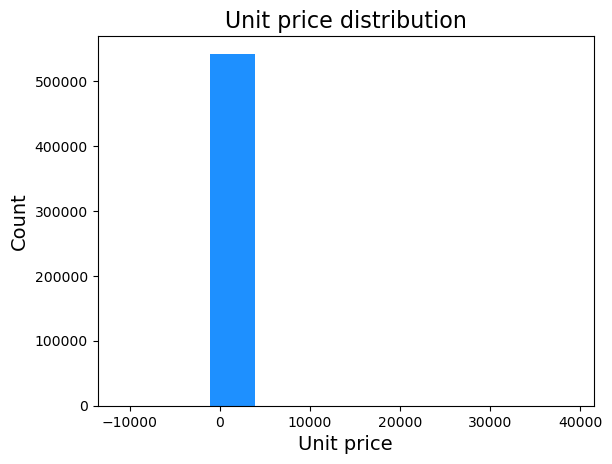

In [17]:
# Let's look at the price distribution of the products

plt.hist(data=data, x='UnitPrice', color='dodgerblue')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

In [18]:
data['UnitPrice'].describe(percentiles=[.99])

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
50%           2.080000
99%          18.000000
max       38970.000000
Name: UnitPrice, dtype: float64

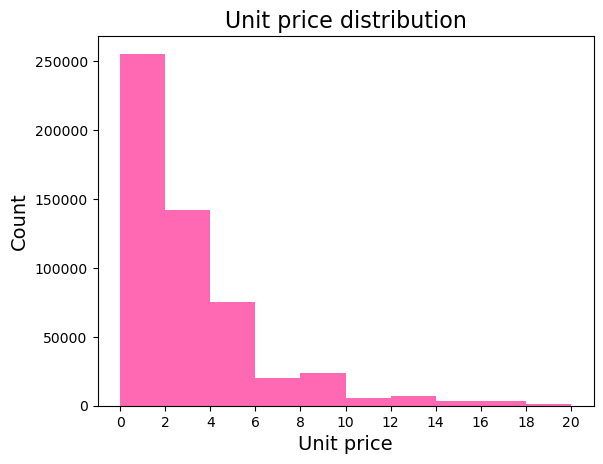

In [19]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=data, x='UnitPrice', bins=bins, color='hotpink')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16)
plt.show()

In [20]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


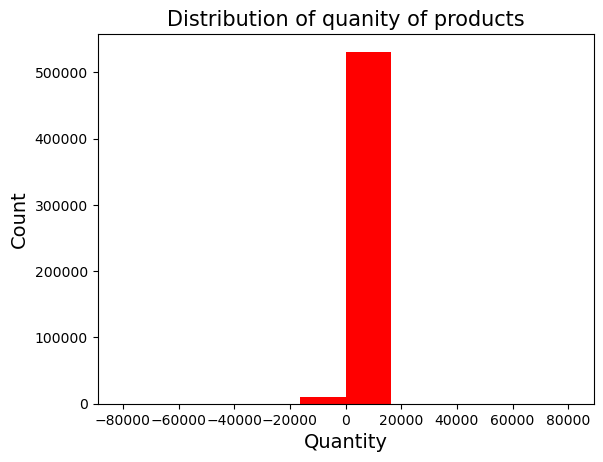

In [21]:
plt.hist(data = data, x='Quantity', color='red')
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Distribution of quanity of products', fontsize = 15)
plt.show()

In [22]:
data['Quantity'].describe(percentiles=[.90])

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
50%           3.000000
90%          24.000000
max       80995.000000
Name: Quantity, dtype: float64

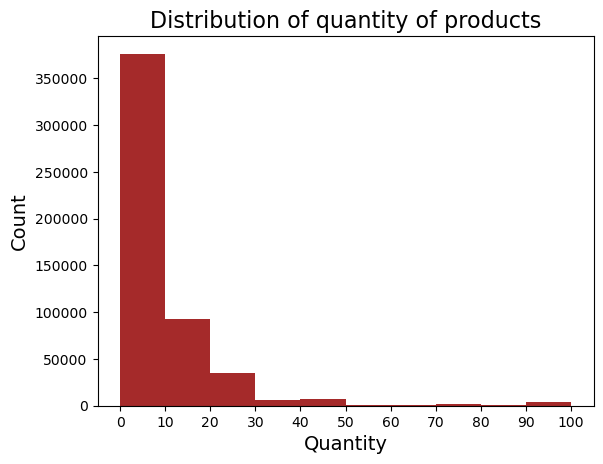

In [23]:
bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.hist(data = data, x = 'Quantity', bins=bins, color = 'Brown')
plt.xticks(ticks,ticks)
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Distribution of quantity of products', fontsize = 16)
plt.show()

In [24]:
neg_quantity = data[data['Quantity']<0]

In [25]:
neg_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [26]:
neg_quantity.shape

(10624, 8)

In [27]:
print("The percentage of records with negative Quantity:", neg_quantity.shape[0]*100/data.shape[0])

The percentage of records with negative Quantity: 1.9604767590130445


**Data Cleaning and Transformation**

*Drop Null Values*

We have NULL records in columns CustomerId and Description. Because we are planning to predict CLTV, we need records for each customer ID to proceed calculations. Let's drop rows containing NULL values

In [28]:
data.dropna(subset=['CustomerID'], inplace=True)

In [29]:
data.shape

(406829, 8)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Handle negative quantity

In [31]:
data = data.loc[data['Quantity'] > 0]

In [32]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Remove rows with negative price

In [33]:
data = data.loc[data['UnitPrice'] > 0]

In [34]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Handle Incomplete Data

Period of time for the purchase records is from December 1, 2010 to December 9, 2011. The data for the last month is incomplete. Because we are planning to predict CLTV for the next 3 months and we will be aggregating data monthly, let us ignore the records for the incomplete month

In [35]:
data = data.loc[data['InvoiceDate'] < '2011-12-01']

In [36]:
# Let's check the time period
data['InvoiceDate'].min(), data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:37:00'))

Calculate total sales

In [37]:
data['Sales'] = data['Quantity'] * data['UnitPrice']

In [38]:
data_orders = data.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})

In [39]:
data_orders.head(8)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00

In [40]:

data_orders['InvoiceDate'].max(), data_orders['InvoiceDate'].min()

(Timestamp('2011-11-30 17:37:00'), Timestamp('2010-12-01 08:26:00'))

**Data Analysis**

In order to predict and calculate CLTV, we have to estimate the frequency, recency, and total amount of purchases by each customer. We are going to determine basic information about each customer's average and lifetime purchase amount, as well as each customer's duration and frequency of purchase.

In [41]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [42]:
data_summary = data_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]
             })

In [43]:
data_summary.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

**Repeate Customer**

Number of Purchase

In [44]:
data_summary.columns = ['_'.join(col).lower() for col in data_summary.columns]

In [45]:
data_summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [46]:
data_summary = data_summary.loc[data_summary['invoicedate_purchase_duration']>0]
data_summary.shape

(2692, 9)

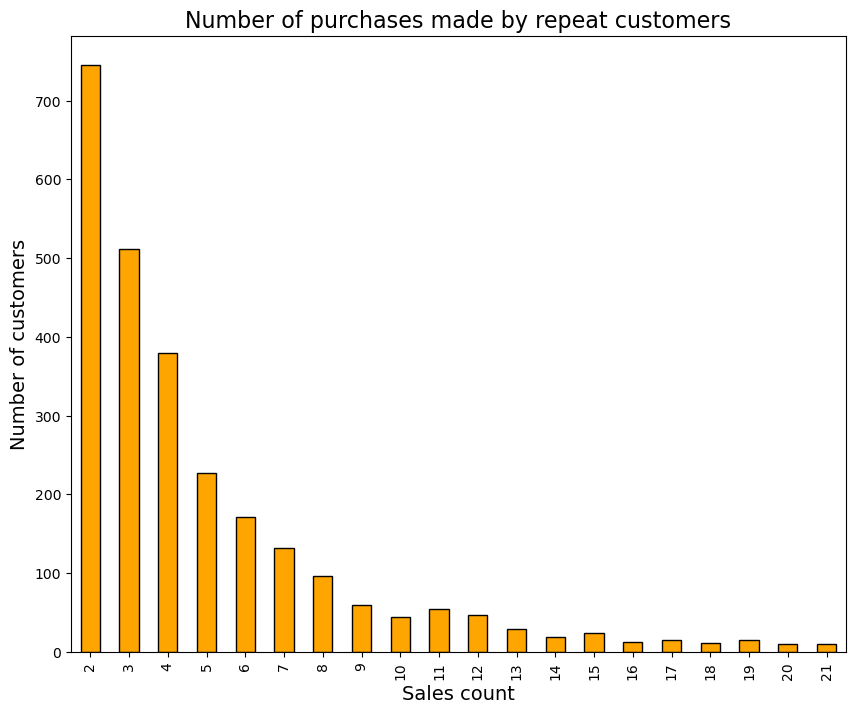

In [47]:
# Let's look at the number of purchases
ax = data_summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar', 
        color='orange',
        edgecolor = 'black', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16)
plt.show()

Average number of days between purchases

Text(0.5, 1.0, 'Frequency of purchases made by repeat customers')

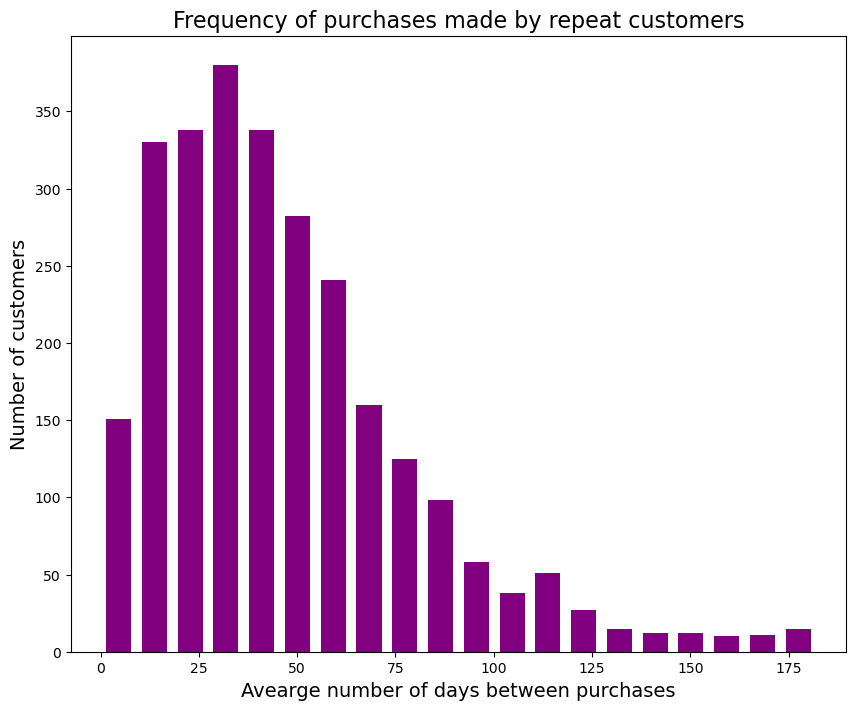

In [48]:
ax = data_summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='purple',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Avearge number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16)

**Predict 3-month CLTV**

We are going to build a model, which predicts CLTV for 3 months. First, let us slice the data into chunks with 3-month data each and take the last chunk as the target for predictions

**Preparing Data**

In [49]:
clv_freq = '3M'

In [50]:
df_data = data_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq=clv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})

In [51]:
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]

In [52]:
df_data = df_data.reset_index()

In [53]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [54]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   9219 non-null   float64       
 1   InvoiceDate  9219 non-null   datetime64[ns]
 2   sales_sum    9219 non-null   float64       
 3   sales_avg    9219 non-null   float64       
 4   sales_count  9219 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 360.2 KB


In [55]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [56]:
map_date_month

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [57]:
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2


In [58]:
df_data['M'].value_counts()

M
M_1    2406
M_2    2161
M_3    1991
M_4    1776
M_5     885
Name: count, dtype: int64

In [59]:
data_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'], 
                values=['sales_sum', 'sales_avg', 'sales_count'], 
                columns='M', 
                index='CustomerID')
data_features.reset_index()

CustomerID   sales_avg                                sales_count       \
M                       M_2      M_3           M_4     M_5         M_2  M_3   
0       12346.0         NaN      NaN  77183.600000     NaN         NaN  NaN   
1       12347.0  584.910000  509.385    475.390000  711.79         1.0  2.0   
2       12348.0  310.000000  367.000    227.440000  892.80         1.0  1.0   
3       12350.0         NaN      NaN    334.400000     NaN         NaN  NaN   
4       12352.0  316.250000      NaN    312.362000     NaN         2.0  NaN   
...         ...         ...      ...           ...     ...         ...  ...   
3611    18280.0         NaN      NaN    180.600000     NaN         NaN  NaN   
3612    18281.0         NaN   80.820           NaN     NaN         NaN  1.0   
3613    18282.0  100.210000      NaN           NaN     NaN         1.0  NaN   
3614    18283.0   92.696667  131.170    105.966667     NaN         3.0  4.0   
3615    18287.0         NaN  765.280           NaN     NaN         NaN  1.0   

               sales_sum                             
M     M_4  M_5       M_2      M_3       M_4     M_5  
0     1.0  NaN       NaN      NaN  77183.60     NaN  
1     1.0  1.0    584.91  1018.77    475.39  711.79  
2     1.0  1.0    310.00   367.00    227.44  892.80  
3     1.0  NaN       NaN      NaN    334.40     NaN  
4     5.0  NaN    632.50      NaN   1561.81     NaN  
...   ...  ...       ...      ...       ...     ...  
3611  1.0  NaN       NaN      NaN    180.60     NaN  
3612  NaN  NaN       NaN    80.82       NaN     NaN  
3613  NaN  NaN    100.21      NaN       NaN     NaN  
3614  3.0  NaN    278.09   524.68    317.90     NaN  
3615  NaN  NaN       NaN   765.28       NaN     NaN  

[3616 rows x 13 columns]

In [60]:
data_features.columns = ['_'.join(col) for col in data_features.columns]
data_features.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [61]:
data_features.reset_index(level=0, inplace=True)
data_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
3,12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
4,12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [62]:
data_features.fillna(0, inplace=True)

In [63]:
# Let's check the Null values
data_features.isnull().sum().sum()

0

In [64]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3616 non-null   float64
 1   sales_avg_M_2    3616 non-null   float64
 2   sales_avg_M_3    3616 non-null   float64
 3   sales_avg_M_4    3616 non-null   float64
 4   sales_avg_M_5    3616 non-null   float64
 5   sales_count_M_2  3616 non-null   float64
 6   sales_count_M_3  3616 non-null   float64
 7   sales_count_M_4  3616 non-null   float64
 8   sales_count_M_5  3616 non-null   float64
 9   sales_sum_M_2    3616 non-null   float64
 10  sales_sum_M_3    3616 non-null   float64
 11  sales_sum_M_4    3616 non-null   float64
 12  sales_sum_M_5    3616 non-null   float64
dtypes: float64(13)
memory usage: 367.4 KB


In [65]:
data_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [66]:
data_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]
data_target.columns = ['CustomerID', 'CLV_'+clv_freq]
data_target.shape

(2406, 2)

In [67]:
data_target.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [68]:
data_sample_set = data_features.merge(
                data_target, 
                left_on='CustomerID', 
                right_on='CustomerID',
                how='left')
data_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,NaN
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,NaN
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,NaN
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [69]:
data_sample_set.fillna(0, inplace=True)

In [70]:
data_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [71]:
data_sample_set['CLV_3M'].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

In [72]:
target_var = 'CLV_3M'
all_features = [x for x in data_sample_set.columns if x not in ['CustomerID', target_var]]
all_features

['sales_avg_M_2',
 'sales_avg_M_3',
 'sales_avg_M_4',
 'sales_avg_M_5',
 'sales_count_M_2',
 'sales_count_M_3',
 'sales_count_M_4',
 'sales_count_M_5',
 'sales_sum_M_2',
 'sales_sum_M_3',
 'sales_sum_M_4',
 'sales_sum_M_5']

In [73]:
data_sample_set

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00,0.00
3612,18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00,0.00
3613,18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00,0.00
3614,18283.0,92.696667,131.170,105.966667,0.00,3.0,4.0,3.0,0.0,278.09,524.68,317.90,0.00,766.21


**Training the model**

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(data_sample_set[all_features], data_sample_set[target_var], random_state=2,test_size=0.35)

**Linear Regression**

In [75]:
lr = LinearRegression(n_jobs=1)


In [76]:
lr.fit(X_train, Y_train)

LinearRegression(n_jobs=1)

In [77]:
lr.intercept_

-17.52658031348949

In [78]:
coef = pd.DataFrame(list(zip(all_features, lr.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,sales_avg_M_2,0.211380
1,sales_avg_M_3,-0.059222
2,sales_avg_M_4,0.091413
3,sales_avg_M_5,-0.581033
4,sales_count_M_2,128.559625
5,sales_count_M_3,-55.323992
6,sales_count_M_4,18.092563
7,sales_count_M_5,-39.690706
8,sales_sum_M_2,0.251125
9,sales_sum_M_3,0.377412


*Model Evaluation*

In [79]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

**R-SQUARED**

In [80]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=Y_train, y_pred=pred_train))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=Y_test, y_pred=pred_test))

R-Squared for Train set: 0.71
R-Squared for Test set: 0.71


**Median Absolute Error**

In [81]:
print('MedAE for Train set: %0.2f' % median_absolute_error(y_true=Y_train, y_pred=pred_train))
print('MedAE for Test set: %0.2f' % median_absolute_error(y_true=Y_test, y_pred=pred_test))

MedAE for Train set: 202.41
MedAE for Test set: 205.20


**Scatter plot**

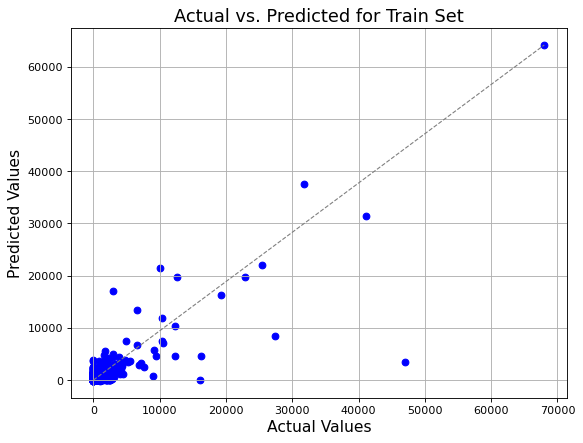

In [82]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(Y_train, pred_train, color='blue')
plt.plot([0, max(Y_train)], [0, max(pred_train)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Train Set', fontsize=16)
plt.grid()

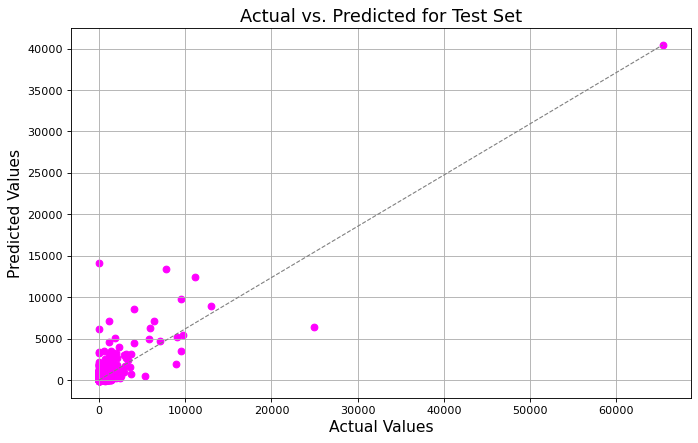

In [83]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(Y_test, pred_test, color='magenta')
plt.plot([0, max(Y_test)], [0, max(pred_test)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()